# k-Means Clustering

Do $k$-Means Clustering using a different distance metric.



In [1]:
!wget -nc https://course.ccs.neu.edu/cs6220/fall2023/homework-4/data/f150_motor_distributors.txt

import numpy as np
import matplotlib.pyplot as plt

all_data = np.loadtxt("f150_motor_distributors.txt", delimiter=",")

--2024-02-15 21:48:14--  https://course.ccs.neu.edu/cs6220/fall2023/homework-4/data/f150_motor_distributors.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255541 (250K) [text/plain]
Saving to: ‘f150_motor_distributors.txt’

f150_motor_distribu 100%[===================>] 249.55K  --.-KB/s    in 0.05s   

2024-02-15 21:48:14 (4.89 MB/s) - ‘f150_motor_distributors.txt’ saved [255541/255541]



### Vanilla k-Means

Eucleadian Distance

In [2]:
def eu_distance(x,y):
  return (x-y).T @ (x - y)

Calculate Convergence

In [3]:
def calculate_convergence(centroid_old, centroid_new):
    return np.sqrt(np.sum((centroid_new - centroid_old)**2))

### Production Information

In [4]:
def mahalanobis_distance(x,y, p_inv):
  return (x-y).T @ p_inv @ (x - y)

### K means Implentation

In [5]:
def kmeans_cluster(data,
                   centroids = np.random.randn(2,5),
                   P = np.eye(2),
                   num_iterations = 100):

  centroids = data.T[:, :5].T
  P_inv = np.linalg.inv(P.T @ P)
  classes = np.random.choice(5, len(data))

  for j in range(num_iterations):
    # For each point in X, calculate the distance to each centroid
    for i in range(len(data)):
      classes[i] = np.argmin([mahalanobis_distance(data[i], centroid,P_inv) for centroid in centroids])
    # For each centroid and calculate the mean of the points assigned to it and update the centroid to the calculated mean
    num_centroids = np.array(
        [np.mean(data[np.where(classes[:]==i)], axis=0) for i in range(len(centroids))]
        )
    if(calculate_convergence(centroids,num_centroids)<1e-4):
      break
    centroids = num_centroids

  # Return the final centroids and clusters
  return centroids, classes

### Plotting the Cluster formation

In [6]:
def plot_data(data, centroids, classes):
  #choosing five different colors
  colors = ['r', 'g', 'b', 'm', 'y']
  #plotting each section of data with different clusters
  for i in range(len(centroids)):
    cluster_data = data[classes == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i])
  for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='x', s=100, c='black', label=f'Centroid {i}')
  return

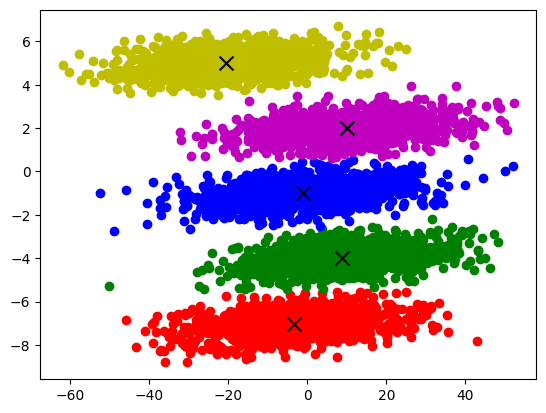

In [8]:
use_P = True #@param
centroids_ = np.array([[10.0, 10.0], [-10.0, -10.0], [2.0, 2.0], [3.0, 3.0], [-3.0, -3.0]])

if not use_P:
  P_ = np.eye(2)
else:
  P_ = np.array([[10, 0.5], [-10, 0.25]])

centroids_, classes_ = kmeans_cluster( all_data, centroids_, P = P_ )
plot_data(all_data, centroids_, classes_)


### First Principle Component of aggregate data

The First Principal Component is  [ 0.99838317 -0.05684225]


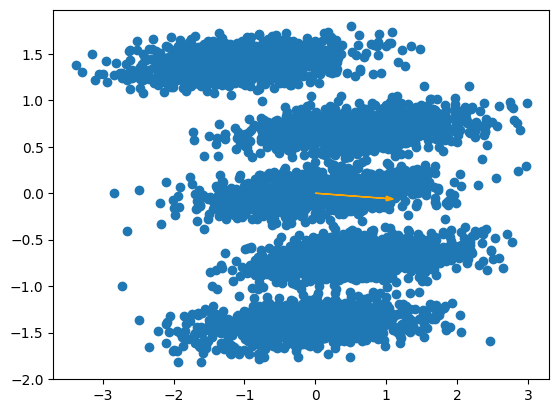

In [26]:
eigenvalues, eigenvectors = np.linalg.eig(np.cov(all_data.T))
pc1 = eigenvectors.T[np.argsort(eigenvalues)][-1]
pc2 = eigenvectors.T[np.argsort(eigenvalues)][0]
def standardize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    return standardized_data
std_data = standardize_data(all_data)
plt.scatter(std_data[:,0], std_data[:,1])
print("The First Principal Component is ",pc1)
plt.arrow(0, 0, pc1[0], pc1[1], head_width=0.05, head_length=0.1, fc='orange', ec='orange')

### First Component of each cluster

The first component of Cluster 0 is [-0.70710678 -0.70710678]
The first component of Cluster 1 is [0.70710678 0.70710678]
The first component of Cluster 2 is [-0.70710678 -0.70710678]
The first component of Cluster 3 is [0.70710678 0.70710678]
The first component of Cluster 4 is [-0.70710678 -0.70710678]


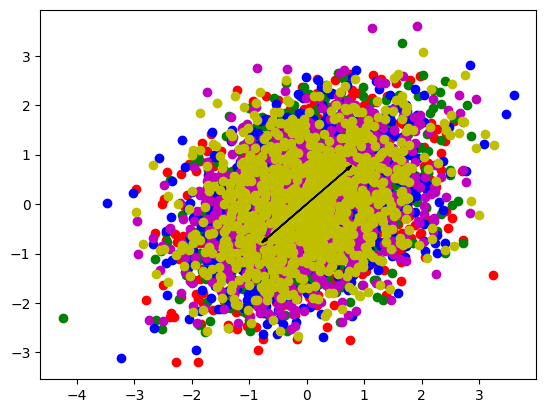

In [25]:
colors = ['r', 'g', 'b', 'm', 'y']
pc1=[]
#plotting each section of data with different clusters
for i in range(len(centroids_)):
  cluster_data = standardize_data(all_data[classes_ == i])
  eigenvalues, eigenvectors = np.linalg.eig(np.cov(cluster_data.T))
  pc1.append(eigenvectors.T[np.argsort(eigenvalues)][-1])
  plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i])

for i, pc in enumerate(pc1):
  print(f"The first component of Cluster {i} is {pc}")
  plt.arrow(0, 0, pc[0], pc[1], head_width=0.05, head_length=0.1, fc='black', ec='black')